## Integral de sen(x) através Monte Carlo

Area 1.93


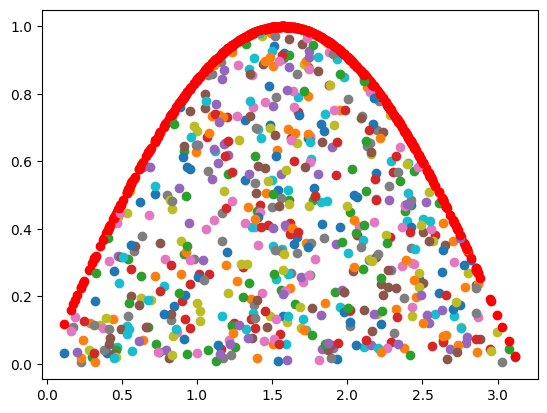

In [2]:
import numpy as np
import matplotlib.pyplot as plt
xI = 0
xF = np.pi
yMax = 1
N = 1000
n = 0
for i in range(N):
  x = xI + (xF-xI)*np.random.rand()
  y = yMax * np.random.rand()
  if y<=np.sin(x):
    plt.scatter(x,y)
    plt.scatter(x,np.sin(x),color = "red")
    n = n+1
    AI = (n/N) * (xF-xI) * yMax
print( 'Area %.2f'%AI )

## Cálculo de $\pi$ através Monte Carlo

pi = 3.1365


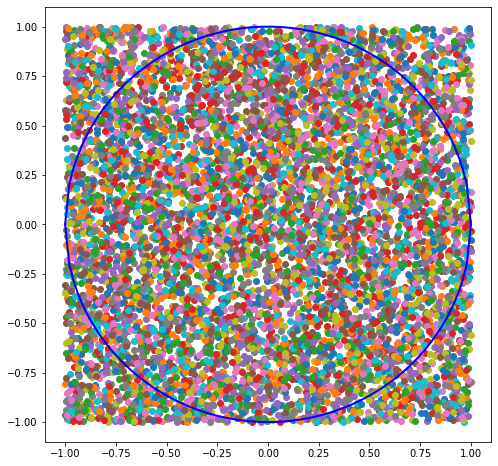

In [ ]:
xc = np.linspace(-1,1,100)
dentro = 0
fora = 0
R = 1
plt.figure(figsize = (8,8))
for k in range(8000):
  x = float(np.random.uniform(-1, 1))
  y = float(np.random.uniform(-1, 1))
  plt.scatter(x,y)
  if float(x**2 + y**2) <= float(R**2):
    dentro += 1
  elif float(x**2 + y**2) > float(R**2):
    fora += 1
plt.plot(xc,np.sqrt(R**2 - xc**2),color = "blue",linewidth = 2)
plt.plot(xc,-np.sqrt(R**2 - xc**2),color = "blue",linewidth = 2)
pi = (dentro/(dentro + fora))*(2*R)**2
print('pi = %.4f'%pi)

In [ ]:

for k in range(100000000):
  x = float(np.random.uniform(-1, 1))
  y = float(np.random.uniform(-1, 1))
  if float(x**2 + y**2) <= float(R**2):
    dentro += 1
  elif float(x**2 + y**2) > float(R**2):
    fora += 1
pi = (dentro/(dentro + fora))*(2*R)**2
print('pi = %.4f'%pi)

pi = 3.1419


$r^2 = x^2 + y^2$

## Simulação de Dados com Valor Real de \( x \) e sua Respectiva Tendenciosidade de Forma Aleatória

Neste código, realizamos uma simulação de Monte Carlo para gerar dados aleatórios com um valor médio real conhecido \( x = 20 \). O objetivo é avaliar a tendenciosidade do estimador da média e a dispersão dos dados.

1. **Geração de Dados Aleatórios**: Para cada uma das 50.000 iterações, são gerados 10 valores aleatórios a partir de uma distribuição normal centrada em \( x \). A média desses valores é calculada após o processo de filtragem via a função `removeMm()`, que remove extremos ou valores discrepantes.

2. **Estatísticas Calculadas**: Após todas as iterações, as seguintes estatísticas são calculadas:
   - \( \sigma_x \) (sx): O desvio padrão das médias amostradas, representando a dispersão das médias.
   - **Tend**: A tendenciosidade (diferença entre a média estimada e o valor real \( x \)).
   - **sTend**: O erro padrão da tendenciosidade, que quantifica a incerteza na estimativa da média.

A simulação permite avaliar a confiabilidade das estimativas da média sob a influência de ruído aleatório.


In [6]:
def removeMm(array):
  arr = np.sort(array)
  arr = np.delete(arr,[0,-1])
  return arr

array = np.zeros(50000)
arr10 = np.zeros(10)
x = 20
for k in range(len(array)):
  for i in range(len(arr10)):
    arr10[i] = x + np.random.randn()
  array[k] = np.mean(np.mean(removeMm(arr10)))

sx = np.std(array,ddof=1)
tend = np.mean(array)-x
stend = np.std(array,ddof=1)/np.sqrt(len(array))

print(f'sx:{sx}')
print(f'tend:{tend} | stend:{stend}')

sx:0.32217200407494156
tend:0.0013470693618415908 | stend:0.0014407970031178172
